In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing the dataset
df=pd.read_csv("breast_cancer.csv")


Data Preprocessing

In [36]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
df.shape

(569, 32)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [39]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [40]:
#calculating the number of null values in each column
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [41]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\varsh\AppData\Local\Temp\ipykernel_24864\2551899293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis",data=df,palette='magma')


<Axes: xlabel='diagnosis', ylabel='count'>

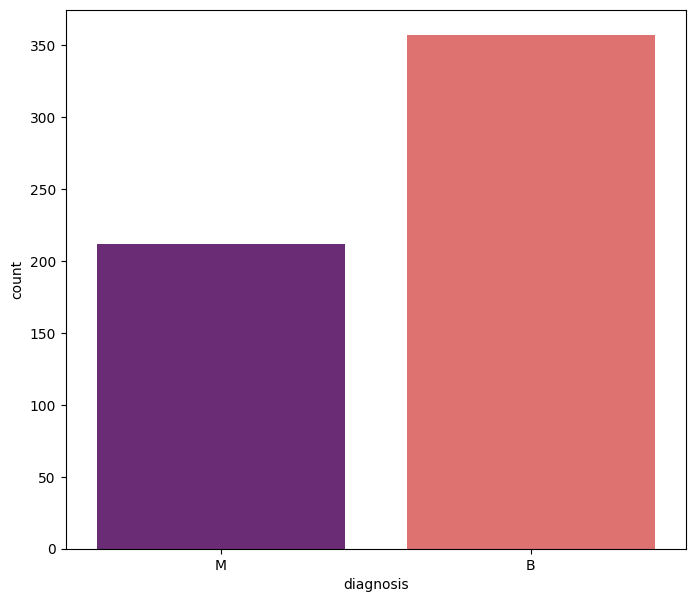

In [7]:
#Histogram plot for diagnosis of breast cancer(M->Malignant B->Benige)
plt.figure(figsize=(8,7))

sns.countplot(x="diagnosis",data=df,palette='magma')

In [43]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [44]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.dtypes


,0
id,int64
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [45]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [46]:
df.shape

(569, 32)

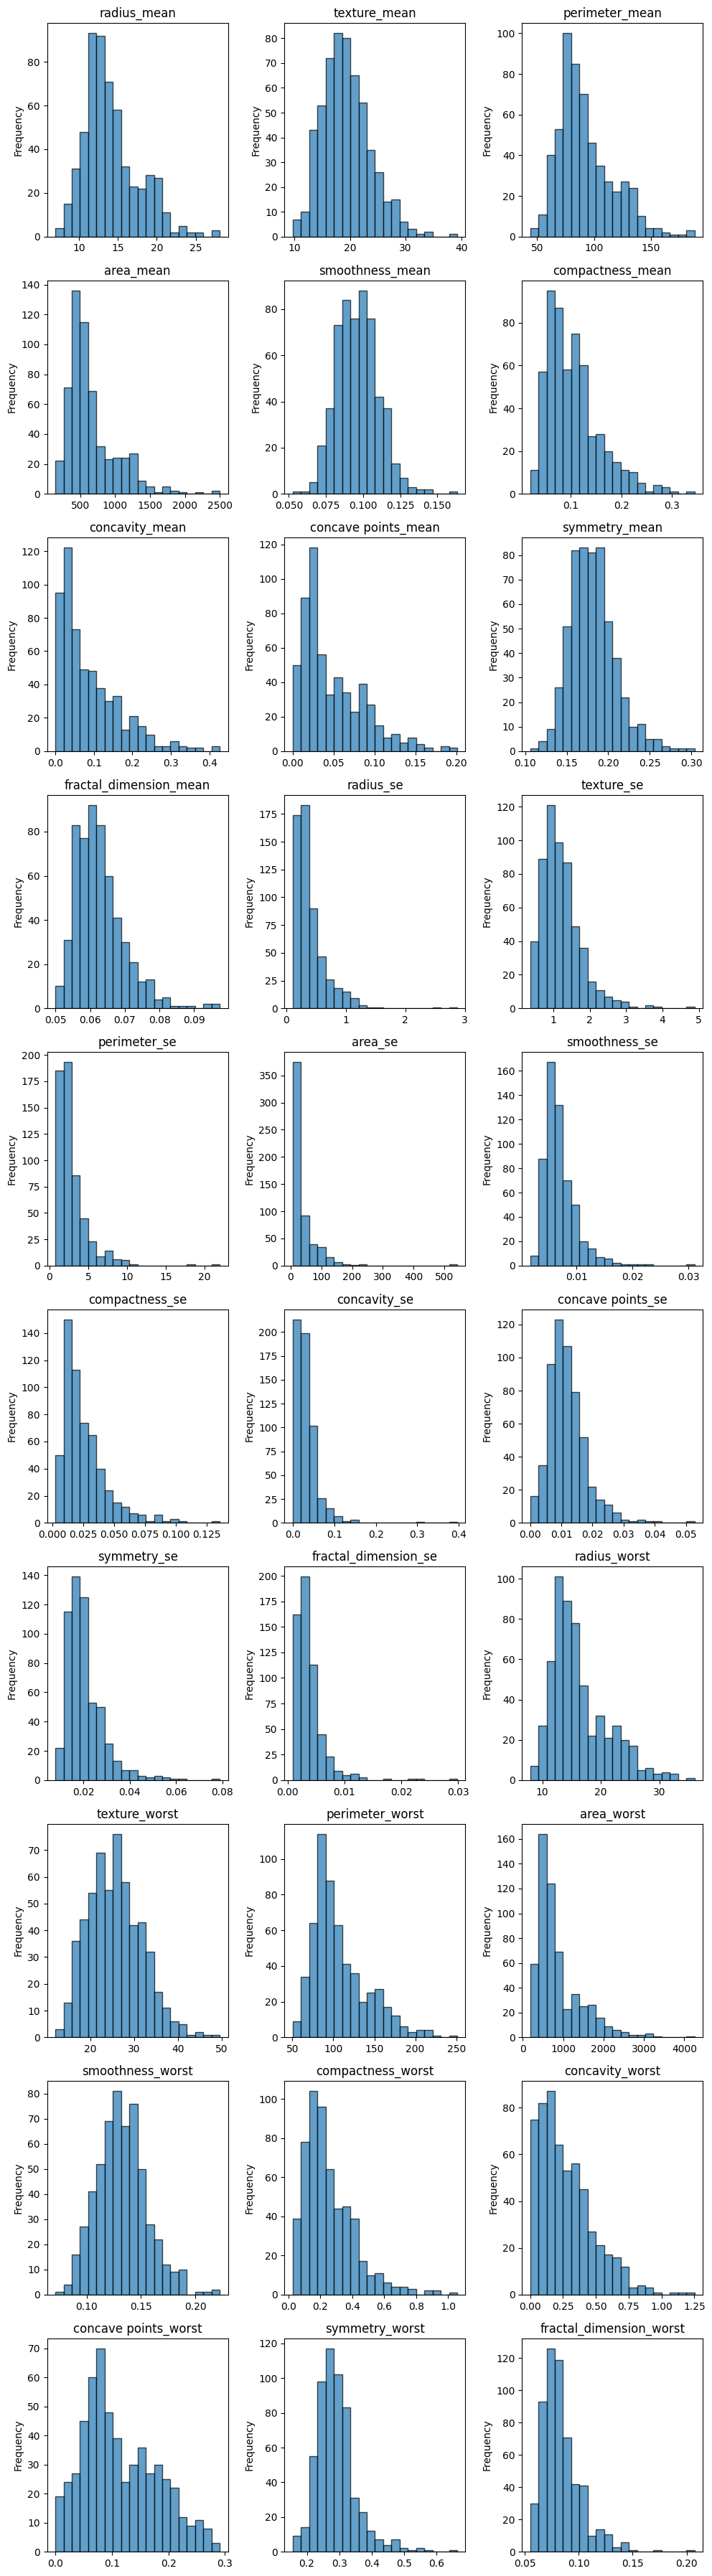

In [47]:
plt.figure(figsize=(10, 36))
#plotting distributions of every feature to check skewness of that feature
for i in range(2, 32):
    plt.subplot(10, 3, i-1)
    df.iloc[:, i].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
    plt.title(df.columns[i])

plt.tight_layout()

plt.show()

In [48]:
#splitting dataset into input features and output
X=df.drop(columns=['id','diagnosis'],axis=1)
Y=df['diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [50]:
#From plots we can observe that many of them are normally distributed ,some are right skewed and some are left skewed
#So we use MinMaxscaler to standandize them
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_final=pd.DataFrame(X_scaled,columns=X.columns)#Our final input X
X_final.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [51]:
Y.tail()

,diagnosis
564,1
565,1
566,1
567,1
568,0


In [52]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input
from sklearn.metrics import accuracy_score,recall_score

from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall

In [53]:
#Splitting the dataset into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y,test_size=0.2,random_state=42)

Construction of ANN

In [54]:
#Constructing the ANN with input layer(30) ,first hidden layer(nodes=32 ),second hidden layer(nodes=16 ) and an output layer(node=1)
#Hidden layers with activation function :'relu' and output layer with activation function:'sigmoid'
model = Sequential([
    Input(shape=(30,)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [55]:

#Creation of model with binary_crossentropy loss function with an optimizer stochastic gradient descent
# Calculation of model metrics :accuracy,recall and precision
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy', Precision(), Recall()])


In [56]:
#Model generation with our training dataset
#batch_size of 32
history=model.fit(X_train,Y_train,epochs=750,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.4385 - loss: 0.8217 - precision_2: 0.1736 - recall_2: 0.1200 - val_accuracy: 0.5789 - val_loss: 0.6691 - val_precision_2: 0.4000 - val_recall_2: 0.2326
Epoch 2/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6337 - loss: 0.6407 - precision_2: 0.5188 - recall_2: 0.2418 - val_accuracy: 0.7544 - val_loss: 0.5454 - val_precision_2: 0.8571 - val_recall_2: 0.4186
Epoch 3/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7777 - loss: 0.5049 - precision_2: 0.7867 - recall_2: 0.3817 - val_accuracy: 0.8509 - val_loss: 0.4618 - val_precision_2: 0.9062 - val_recall_2: 0.6744
Epoch 4/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8707 - loss: 0.4460 - precision_2: 0.9884 - recall_2: 0.6427 - val_accuracy: 0.8772 - val_loss: 0.3996 - val_precision_2: 0.9394 - val_recall_2: 0.7209
Epoch 5/750
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9034 - loss: 0.4013 - precision_2: 0.9924 - recall_2: 0.7369 - va

In [57]:
import matplotlib.pyplot as plt

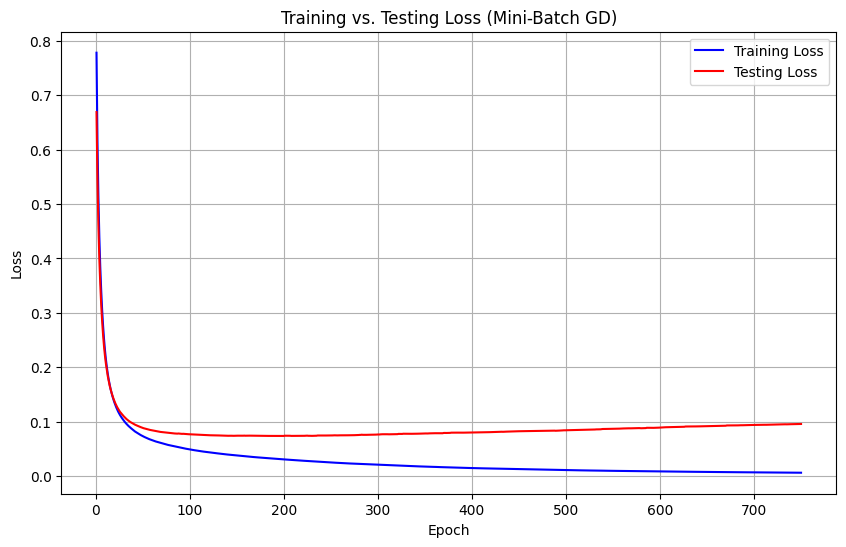

In [58]:
#Plotting training and test set loss for each epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, 751), history.history['loss'], label='Training Loss', color='blue')
plt.plot(range(1, 751), history.history['val_loss'], label='Testing Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Testing Loss (Mini-Batch GD)')
plt.grid(True)
plt.legend()
plt.show()


In [59]:
#Finding at which epoch the test set loss is minimum
l=history.history['val_loss']
min_index=l.index(min(l))
print(min_index)

191


Reconstructing optimum model

In [60]:
#Reconstuction of optimum model(for which the test set loss is minimum)
optimum_model = Sequential([
    Input(shape=(30,)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [61]:
optimum_model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy', Precision(), Recall()])


In [62]:
history_final=optimum_model.fit(X_train,Y_train,epochs=min_index,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/191
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6186 - loss: 0.6538 - precision_3: 0.4364 - recall_3: 0.3603 - val_accuracy: 0.8246 - val_loss: 0.5468 - val_precision_3: 0.7949 - val_recall_3: 0.7209
Epoch 2/191
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8308 - loss: 0.5359 - precision_3: 0.7804 - recall_3: 0.7302 - val_accuracy: 0.8860 - val_loss: 0.4567 - val_precision_3: 0.8947 - val_recall_3: 0.7907
Epoch 3/191
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9023 - loss: 0.4466 - precision_3: 0.8644 - recall_3: 0.8639 - val_accuracy: 0.9298 - val_loss: 0.3945 - val_precision_3: 0.9487 - val_recall_3: 0.8605
Epoch 4/191
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9210 - loss: 0.3937 - precision_3: 0.9430 - recall_3: 0.8460 - val_accuracy: 0.9561 - val_loss: 0.3466 - val_precision_3: 0.9750 - val_recall_3: 0.9070
Epoch 5/191
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9369 - loss: 0.3616 - precision_3: 0.9513 - recall_3: 0.8796 - v

In [63]:
#Predicting the output based on our optimum model with a threshold 0.5 on output layer
Y_test_prob=optimum_model.predict(X_test)
Y_test_pred=[0 if val<0.5 else 1 for val in Y_test_prob]
Y_train_prob=optimum_model.predict(X_train)
Y_train_pred=[0 if val<0.5 else 1 for val in Y_train_prob]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [64]:
#Calculation of Accuracy and Recall for Train and Test datasets
train_accuracy_score=accuracy_score(Y_train,Y_train_pred)
test_accuracy_score=accuracy_score(Y_test,Y_test_pred)

train_recall_score=recall_score(Y_train,Y_train_pred)
test_recall_score=recall_score(Y_test,Y_test_pred)
print(f'accuracy score of train data is {train_accuracy_score}')
print(f'recall score of train data is {train_recall_score}')
print()
print(f'accuracy score of test data is {test_accuracy_score}')
print(f'recall score of test data is {test_recall_score}')

# Here we calculated recall because for medical datsets recall should have to maximum
# Recall = (TP/TP+FN) (TP->True Positive(number of predicted 1's with actual outcome 1) ,FN->False Negative(Number of predicted 0's with actual outcome as 1))
# As we can see recall depends on FN if Fn is low then recall is high (FN low means our model predicting outcome as 1 more efficiently if our actual outcome is 1)


accuracy score of train data is 0.9912087912087912
recall score of train data is 0.9822485207100592

accuracy score of test data is 0.9824561403508771
recall score of test data is 0.9767441860465116
